## Introduction

This notebook contains code on a simple linear regression problem.

### Data
The data used in this simple illustration contains information about used cars and motorcycles listed on CarDekho.com.  The data is in a CSV file and it includes columns such as model, year, selling price, showroom price, kilometers driven, fuel type, seller type, transmission and number of previous owners. Here is a link to the [data](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho).

We will use this data to predict the selling price of used vehicles.

In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

In [5]:
#load data into pandas dataframe
df = pd.read_csv('data/regression/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
#check for null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Distribution of categorical data
print('----Cars------')
print(df.Car_Name.value_counts())
print('----Fuel type------')
print(df.Fuel_Type.value_counts())
print('----Seller type------')
print(df.Seller_Type.value_counts())
print('----Transmission type------')
print(df.Transmission.value_counts())

----Cars------
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
----Fuel type------
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
----Seller type------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
----Transmission type------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#### Data Cleaning

In [8]:
#Calculate age of car, this will be a better value that the year of the car
from datetime import datetime
currentYear = datetime.now().year
print(currentYear)

2023


In [9]:
#create a new column for the age of the cars, it will be more useful than the Year of the car.
df['Car_Age'] = df.apply(lambda x: currentYear - x['Year'], axis = 1) 
#drop the 'Year' and 'Car_Name' column
df.drop(['Year'], axis=1, inplace=True)
df.drop(['Car_Name'], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


#### Data Visualization

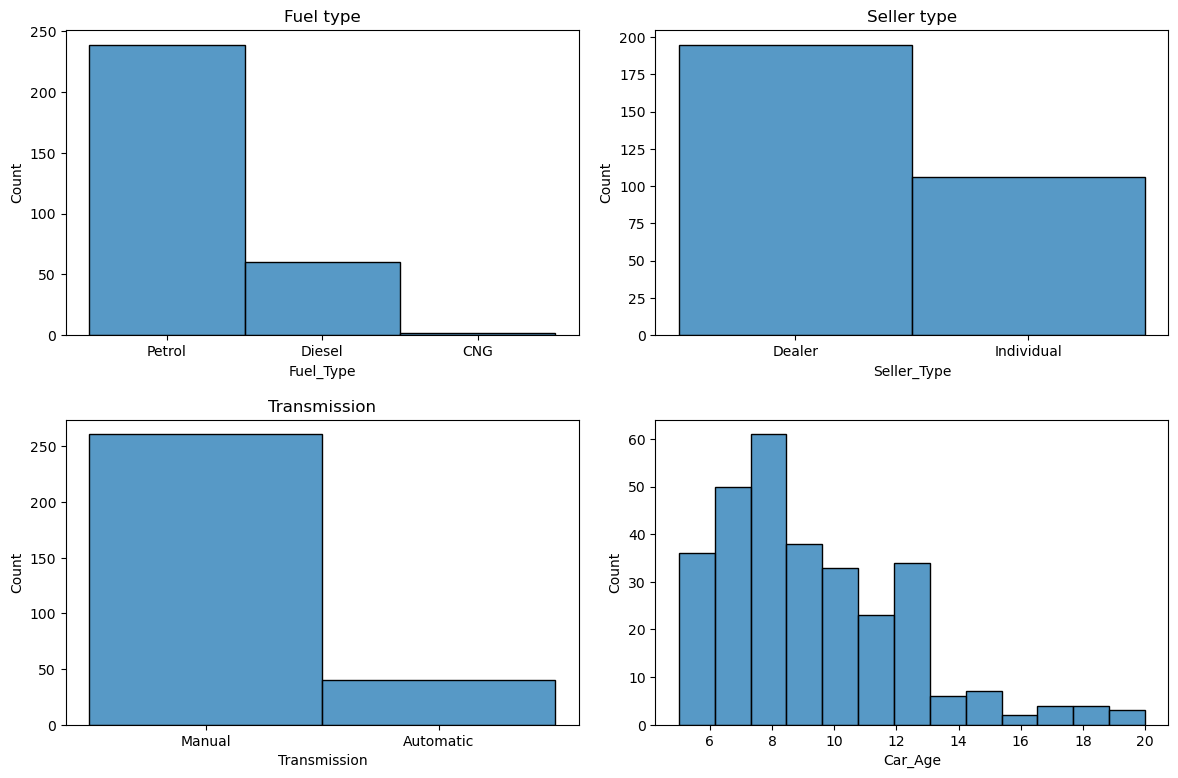

In [31]:
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

#Fuel type
sns.histplot(data=df, x='Fuel_Type', ax=axis[0, 0])
#Seller type
sns.histplot(data=df, x='Seller_Type', ax=axis[0, 1])
#Transmission type
sns.histplot(data=df, x='Transmission', ax=axis[1, 0])
#Age of cars
sns.histplot(data=df, x='Car_Age', ax=axis[1, 1])

axis[0, 0].set_title('Fuel type')
axis[0, 1].set_title('Seller type')
axis[1, 0].set_title('Transmission')
fig.tight_layout(pad=1.5)
plt.show()

<AxesSubplot: >

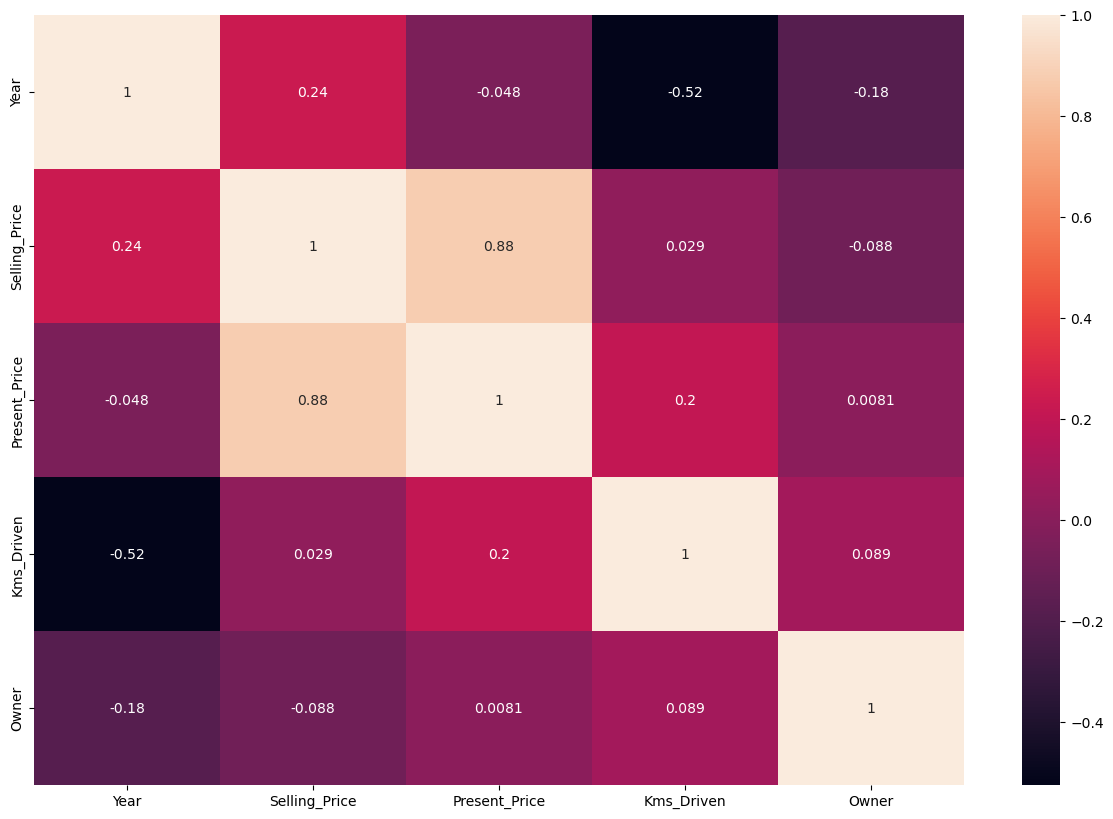

In [7]:
#check correlation of features in the dataset
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), annot = True)